### Example E
Herein, we show to how apply flexible generation where flow rates are varied seasonally as seen below.

In [1]:
# Only needed when FGEM is NOT installed by user
import sys
sys.path.insert(1, '../')

from fgem.world import World
from fgem.utils.config import get_config_from_json
from tqdm.notebook import tqdm

In [2]:
def seasonal_strategy(project, m_prd=100, max_mass_flow=150):
    
    # UPDATE: we first update project state (also, we override parameters if needed)
    month = project.time_curr.month
    if (month >=5) and (month <=8):
        m_prd = max_mass_flow

    project.update_state(m_prd)
    
    # STEP: step power plant and reservoir
    T_inj = project.T_inj
    T_amb = project.T_amb
    m_turbine = project.m_g
    T_prd_wh = project.reservoir.T_prd_wh.mean()
    
    # step powerplant
    project.powerplant.step(m_turbine=m_turbine, 
                            T_prd_wh=T_prd_wh,
                            T_amb=T_amb)
    # step reservoir
    project.reservoir.step(m_prd=m_prd,
                        T_inj=T_inj,
                        T_amb=T_amb)
    
    # RECORD: store the current project timestep
    project.record_step()

In [3]:
# Read configuration file
config = get_config_from_json('configs/exampleE.json')

project = World(config)

# Iterate over project lifetime
for i in tqdm(range(project.max_simulation_steps)):
    seasonal_strategy(project)

# Compute economics and summary results
project.compute_economics()


  0%|          | 0/9125 [00:00<?, ?it/s]

  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


LCOE: 60 $/MWh
NPV: 12 $MM
PBP: 11 yrs


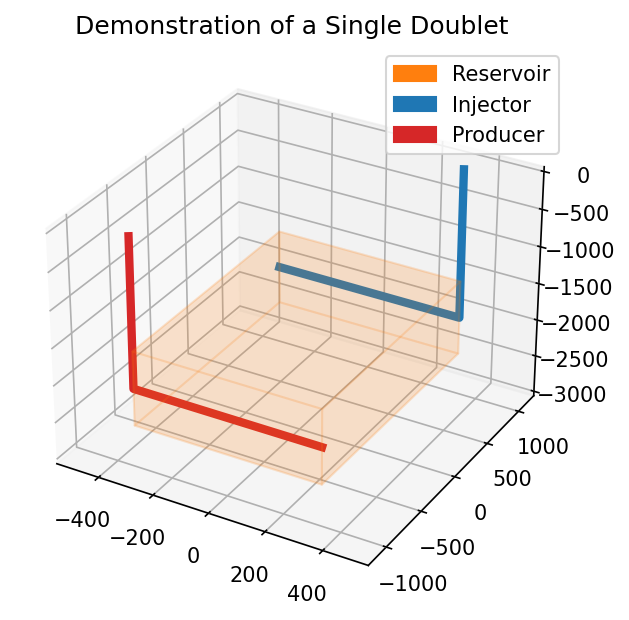

In [4]:
fig = project.reservoir.plot_doublet()

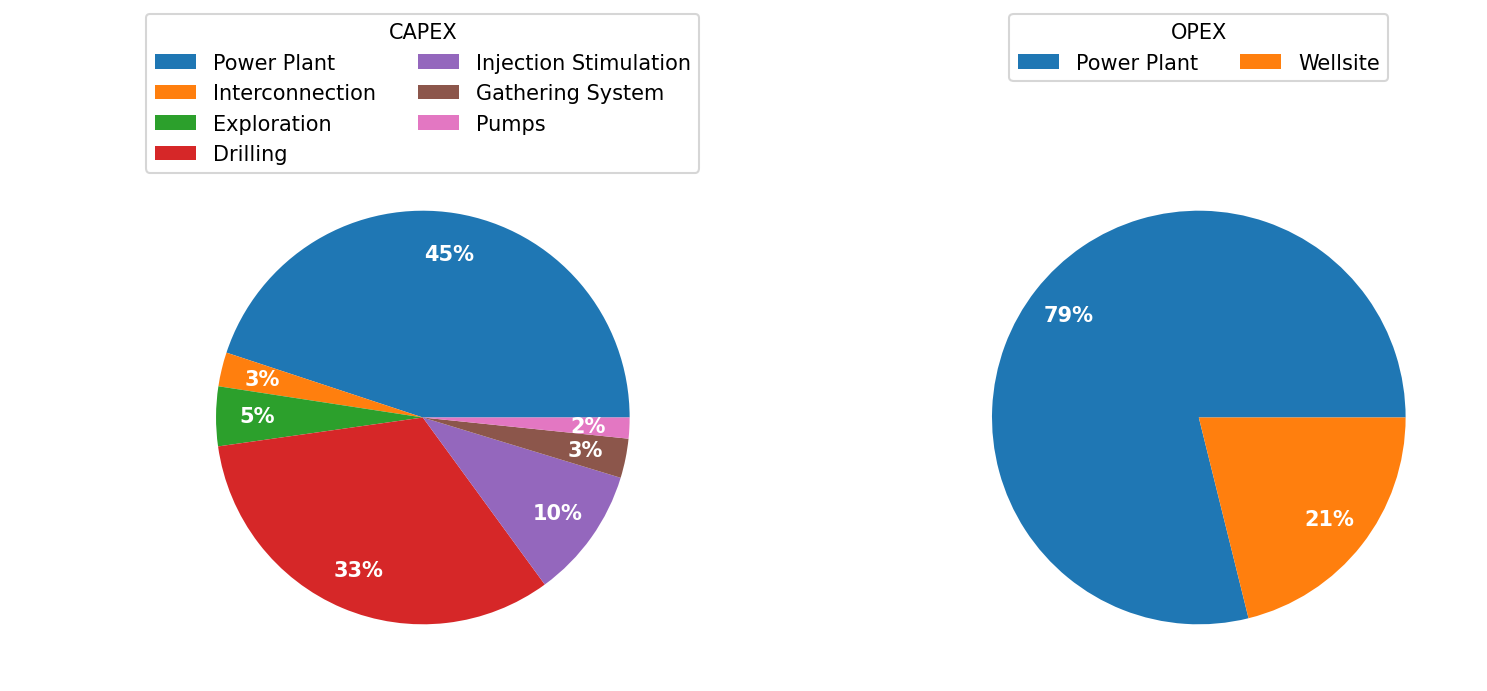

In [5]:
fig = project.plot_economics()

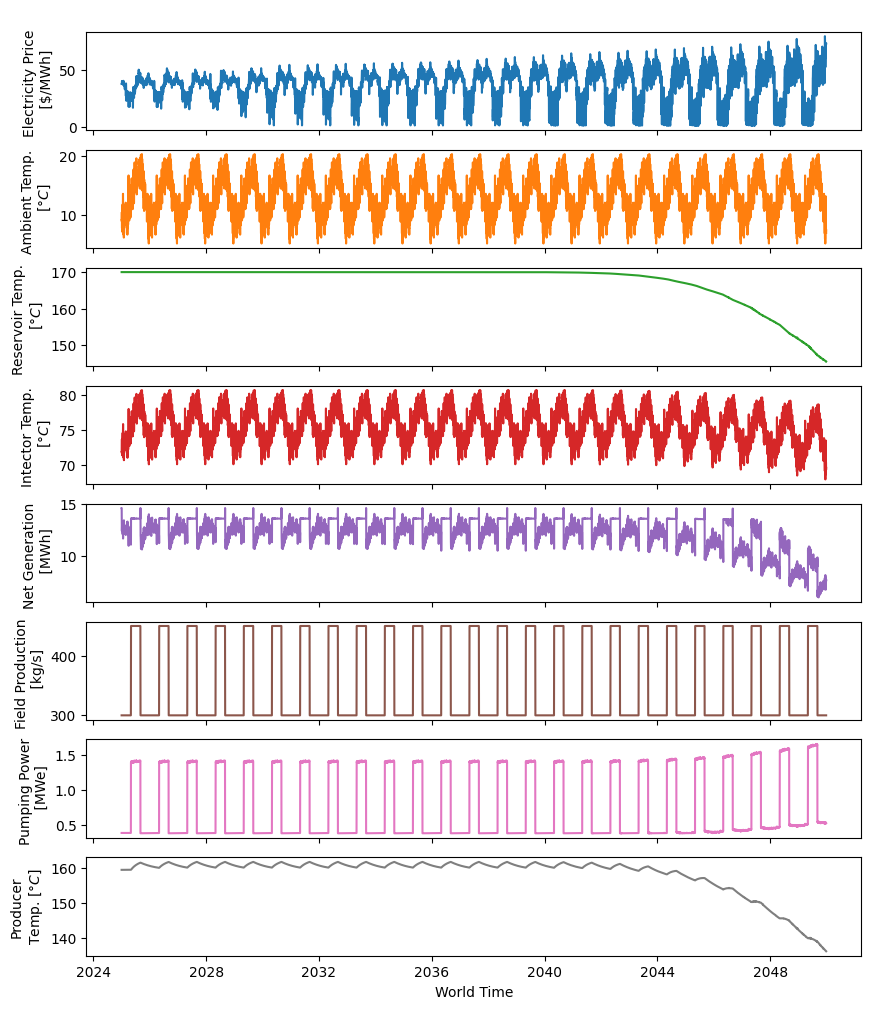

In [6]:
fig = project.plot_operations()